y_data
[2 0 0 ... 1 0 1]
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 32, 8)             80000     
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 8)                 136       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 9         
Total params: 80,145
Trainable params: 80,145
Non-trainable params: 0
_________________________________________________________________
None


//anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3111 samples, validate on 778 samples
Epoch 1/50
3111/3111 [==============================] - 1s 197us/step - loss: 0.6833 - acc: 0.5500 - val_loss: 0.6646 - val_acc: 0.6221
Epoch 2/50
3111/3111 [==============================] - 0s 52us/step - loss: 0.5821 - acc: 0.7274 - val_loss: 0.5800 - val_acc: 0.7249
Epoch 3/50
3111/3111 [==============================] - 0s 50us/step - loss: 0.4355 - acc: 0.8579 - val_loss: 0.5647 - val_acc: 0.7275
Epoch 4/50
3111/3111 [==============================] - 0s 49us/step - loss: 0.3260 - acc: 0.9139 - val_loss: 0.6004 - val_acc: 0.7057
Epoch 5/50
3111/3111 [==============================] - 0s 50us/step - loss: 0.2537 - acc: 0.9399 - val_loss: 0.6164 - val_acc: 0.7172
Epoch 6/50
3111/3111 [==============================] - 0s 52us/step - loss: 0.2120 - acc: 0.9540 - val_loss: 0.6679 - val_acc: 0.7031
Epoch 7/50
3111/3111 [==============================] - 0s 52us/step - loss: 0.1807 - acc: 0.9572 - val_loss: 0.6091 - val_acc: 0.7237
Epoch 8

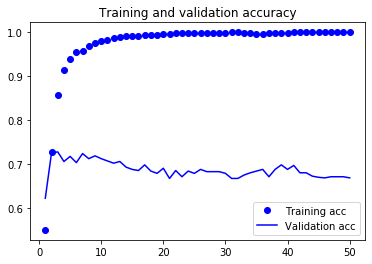

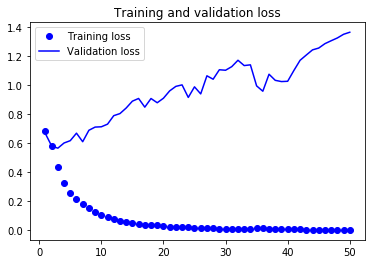

In [31]:
### Simple RNN BJP Example
### Preparing the BJP data 

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,Flatten,SimpleRNN
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


#from string import maketrans

#Loading the BJP dataset
datanew = pd.read_csv('bjp - bjp.csv', delimiter=',',header=None)

#Splitting the label data and the text content
X = datanew[1]
Y = datanew[0]


encoder = preprocessing.LabelEncoder()
y_data = encoder.fit_transform(Y)
print("y_data")
print(y_data)



max_features = 10000  # number of words to consider as features
maxlen = 32 # max len of document

encoded_docs = [one_hot(d,max_features) for d in X]


input_train = pad_sequences(encoded_docs, maxlen= maxlen, padding='post')
model = Sequential()
input_length = 32
model.add(Embedding(max_features,8,input_length=input_length))


model.add(SimpleRNN(8))

model.add(Dense(1, activation='sigmoid'))
# print(model.summary())


# # # # # compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())


history=model.fit(input_train,y_data,epochs=50,batch_size=128,validation_split=0.2)
loss,accuracy = model.evaluate(input_train, y_data, verbose=0)

print('Accuracy : %f' %(accuracy*100))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo => blue circle line
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b => blue line

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


y_data
[2 0 0 ... 1 0 1]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
None


//anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3111 samples, validate on 778 samples
Epoch 1/10
3111/3111 [==============================] - 1s 307us/step - loss: 0.6585 - acc: 0.5914 - val_loss: 0.5886 - val_acc: 0.7249
Epoch 2/10
3111/3111 [==============================] - 0s 130us/step - loss: 0.4502 - acc: 0.8210 - val_loss: 0.4912 - val_acc: 0.7982
Epoch 3/10
3111/3111 [==============================] - 0s 132us/step - loss: 0.2893 - acc: 0.8952 - val_loss: 0.5222 - val_acc: 0.7853
Epoch 4/10
3111/3111 [==============================] - 0s 130us/step - loss: 0.1786 - acc: 0.9421 - val_loss: 0.4798 - val_acc: 0.7918
Epoch 5/10
3111/3111 [==============================] - 0s 143us/step - loss: 0.1145 - acc: 0.9662 - val_loss: 0.4870 - val_acc: 0.7918
Epoch 6/10
3111/3111 [==============================] - 0s 143us/step - loss: 0.0672 - acc: 0.9833 - val_loss: 0.5665 - val_acc: 0.7969
Epoch 7/10
3111/3111 [==============================] - 0s 143us/step - loss: 0.0456 - acc: 0.9887 - val_loss: 0.7699 - val_acc: 0.7776
E

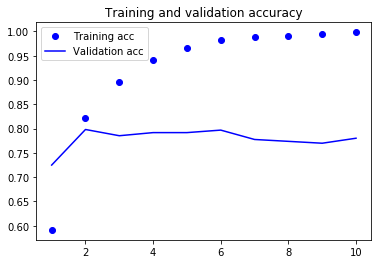

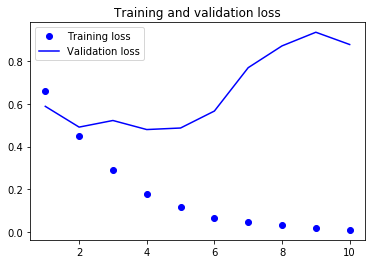

In [2]:
### LSTM BJP Dataset
### Preparing the BJP data 

import pandas as pd
import numpy
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,Flatten,SimpleRNN
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.layers import LSTM

#Loading the BJP dataset
datanew = pd.read_csv('bjp - bjp.csv', delimiter=',',header=None)

#Splitting the label data and the text content
X = datanew[1]
Y = datanew[0]


encoder = preprocessing.LabelEncoder()
y_data = encoder.fit_transform(Y)
print("y_data")
print(y_data)



max_features = 10000  # number of words to consider as features
maxlen = 32 # max len of document

encoded_docs = [one_hot(d,max_features) for d in X]


input_train = pad_sequences(encoded_docs, maxlen= maxlen, padding='post')

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# Number of parameters in Embedding = vocab size x dimension = 10000x32
# Output dimension of LSTM = 32.
# Number of parameters in LSTM = 4 x ((32 + 1) x 32 + 32^2) = 8320
# Params LSTM = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_data,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
loss,accuracy = model.evaluate(input_train, y_data, verbose=0)
print('Accuracy : %f' %(accuracy*100))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo => blue circle line
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b => blue line

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


y_data
[2 0 0 ... 1 0 1]
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 16, 8)             80000     
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 8)                 136       
_________________________________________________________________
dense_32 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_33 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 17        
Total params: 80,569
Trainable params: 80,569
Non-trainable params: 0
_________________________________________________________________
None


//anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3111 samples, validate on 778 samples
Epoch 1/50
3111/3111 [==============================] - 0s 150us/step - loss: 0.9450 - acc: 0.5407 - val_loss: 0.6986 - val_acc: 0.5386
Epoch 2/50
3111/3111 [==============================] - 0s 32us/step - loss: 0.6427 - acc: 0.6291 - val_loss: 0.6760 - val_acc: 0.5810
Epoch 3/50
3111/3111 [==============================] - 0s 31us/step - loss: 0.5305 - acc: 0.7634 - val_loss: 0.6323 - val_acc: 0.6491
Epoch 4/50
3111/3111 [==============================] - 0s 33us/step - loss: 0.3661 - acc: 0.8570 - val_loss: 0.9721 - val_acc: 0.6722
Epoch 5/50
3111/3111 [==============================] - 0s 30us/step - loss: 0.2324 - acc: 0.9203 - val_loss: 0.9833 - val_acc: 0.7095
Epoch 6/50
3111/3111 [==============================] - 0s 31us/step - loss: 0.1526 - acc: 0.9556 - val_loss: 1.3976 - val_acc: 0.7147
Epoch 7/50
3111/3111 [==============================] - 0s 32us/step - loss: 0.0797 - acc: 0.9807 - val_loss: 1.4463 - val_acc: 0.6992
Epoch 8

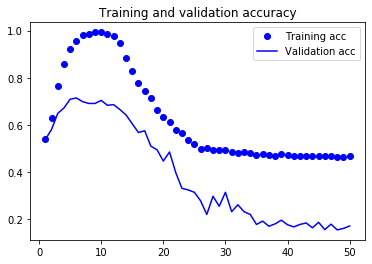

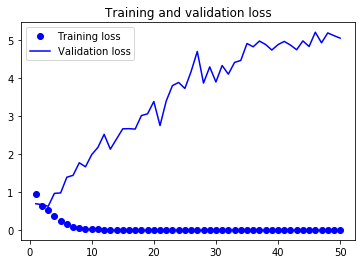

In [33]:
### Simple RNN with ReLU BJP Example
### Preparing the BJP data 

import pandas as pd
import numpy
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,Flatten,SimpleRNN
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


#Loading the BJP dataset
datanew = pd.read_csv('bjp - bjp.csv', delimiter=',',header=None)

#Splitting the label data and the text content
X = datanew[1]
Y = datanew[0]


encoder = preprocessing.LabelEncoder()
y_data = encoder.fit_transform(Y)
print("y_data")
print(y_data)



max_features = 10000  # number of words to consider as features
maxlen = 16 # max len of document

encoded_docs = [one_hot(d,max_features) for d in X]


input_train = pad_sequences(encoded_docs, maxlen= maxlen, padding='post')
model = Sequential()

input_length = 16
model.add(Embedding(max_features,8,input_length=input_length))


model.add(SimpleRNN(8))
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))



# # # # # compile the keras model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
print(model.summary())


history=model.fit(input_train,y_data,epochs=50,batch_size=128,validation_split=0.2)
loss,accuracy = model.evaluate(input_train, y_data, verbose=0)

print('Accuracy : %f' %(accuracy*100))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo => blue circle line
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b => blue line

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
